In [1]:
from PIL import Image
from random import randint, choice
import string
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import normalize
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os      # Библиотека для работы с фаловой системой 
import time 
import pandas as pd
import numpy as np
import random
import pickle
import cv2 as cv

In [ ]:
# def num_randomizer():
#     return randint(0, 500)
# def letter_randomizer():
#     letters = string.ascii_lowercase
#     return ''.join(choice(letters) for i in range(5))
# def russian_randomizer():
#     words = ["ФИО", "Иркутск", "Бонус", "1200/300", "Заместитель", "по", "корпоративной", "ведущий", "инженер", "Янталь", "работа"]
#     return ' '.join(choice(words) for i in range(2))

In [ ]:
# font = ImageFont.truetype("../Downloads/TNR.ttf", 15)
# def image_generation():
#     global font
#     img = Image.new('RGB', (200, 100), (255, 255, 255))
#     drawer = ImageDraw.Draw(img)
# #     num = num_randomizer()
#     text = letter_randomizer()
#     drawer.text((15, 20), f"{text} {letter_randomizer()} {letter_randomizer()}", font=font, fill='black')
#     drawer.text((15, 40), f"{letter_randomizer()} {letter_randomizer()}", font=font, fill='black')
#     img.save(f'printed/printed_{text}.jpg')
# #     img.show()

In [ ]:
# for i in range(200):
#     image_generation()

## Use template to find object on Image
https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

In [ ]:
# import cv2 as cv
# import numpy as np
# from matplotlib import pyplot as plt

In [ ]:
# img_rgb = cv.imread('kpi_118815_4.jpg')
# img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
# template = cv.imread('screen.png',0)
# w, h = template.shape[::-1]
# res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# threshold = 0.8
# loc = np.where( res >= threshold)
# for pt in zip(*loc[::-1]):
#     cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# cv.imwrite('res.png',img_rgb)

## Rename data

In [ ]:
# import pathlib
# path = pathlib.Path("handwritten")
# for i, path in enumerate(path.glob('*.png')):
#     new_name = 'handwritten_' + str(i) + '.png'
#     path.rename('handwritten/' + new_name)

## Prepare data

In [ ]:
# import pathlib
# path = pathlib.Path("texts/handwritten")
# for i, path in enumerate(path.glob('*.png')):
#     im = Image.open(path)
#     name = str(path).split(".")[0]
#     name = name.split("/")[-1]
#     rgb_im = im.convert('RGB')
#     rgb_im.save(f'texts/handwritten/{name}.jpg')
#     os.remove(path)

In [2]:
data = []
labels = []

In [3]:
def get_time_read(dir_read):
    cur_time = time.time()          # Засекаем текущее время
    num = 0                         # Количество прочитанных файлов
    list_dir = os.listdir(dir_read) # Получаем список подкаталогов                  
    for cur_dir in list_dir:
        if cur_dir == '.DS_Store':
            continue
        else:
            list_file = os.listdir(dir_read + '/' + cur_dir)
            try:
                for cur_file in list_file:
                    if cur_file == '.DS_Store':
                        continue
                    image = cv.imread(dir_read + '/' + cur_dir + '/' + cur_file)
                    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
                    image = cv.resize(image, (100, 100))
                    data.append(image)
                    category = cur_file.split('_')[0]
                    if category == 'printed':
                        labels.append(1)
                    else:
                        labels.append(0)
                    num += 1
            except Exception as e:
                print(e)
    print('Количество загруженных изображений =', num)
    print('Затрачено времени -', round(time.time() - cur_time, 2), 'cек')

In [4]:
try:
    get_time_read('texts')
except:
    print('x')

Количество загруженных изображений = 2374
Затрачено времени - 2.8 cек


In [5]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.20, random_state=30)

trainX = normalize(trainX, axis=1)
testX = normalize(testX, axis=1)

In [6]:
INIT_LR = 0.001
EPOCHS = 15

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(100, 100, 1, )))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

2022-07-20 09:55:18.418133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(
              loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam()
             )

In [12]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=64, verbose=1, shuffle=False)

Epoch 1/5
30/30 [==============================] - 22s 741ms/step - loss: 0.0229 - accuracy: 0.9968 - val_loss: 2.6612e-04 - val_accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 25s 845ms/step - loss: 0.0101 - accuracy: 0.9989 - val_loss: 4.5328e-05 - val_accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 21s 700ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 3.7044e-05 - val_accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 21s 695ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 8.8999e-06 - val_accuracy: 1.0000
Epoch 5/5
30/30 [==============================] - 21s 697ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 7.8923e-06 - val_accuracy: 1.0000


In [13]:
_, acc = model.evaluate(testX, testY)
print("Accuracy = ", (acc * 100), "%")

15/15 [==============================] - 1s 94ms/step - loss: 7.8923e-06 - accuracy: 1.0000
Accuracy =  100.0 %


1/1 [==============================] - 0s 40ms/step
The prediction is  [[1.]]
The actual label is  1


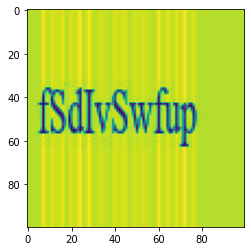

In [20]:
n=2
img=testX[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
print("The prediction is ", model.predict(input_img))
print("The actual label is ", testY[n])